# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [ ]:
#mounting google colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/University Of Texas/Supervised Learning/used_device_data.csv')


## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.500,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,4.308,4.715
1,Honor,Android,17.300,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,5.162,5.519
2,Honor,Android,16.690,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,5.111,5.885
3,Honor,Android,25.500,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,5.135,5.631
4,Honor,Android,15.320,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,4.390,4.948


In [ ]:
print("The dataset has", df.shape[0],"rows and", df.shape[1],"columns")

The dataset has 3454 rows and 15 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

All the data types seems ok accoding to it's variable nature.

Some variables have nulls

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
a = df.isnull().sum()

print("The main_camera_mp varible has:", round(a[5]/df.shape[0]*100,2),"% of the rows nulls")

The main_camera_mp varible has: 5.18 % of the rows nulls


The feature "main_camera_mp" has 179 null observations (5% of the rows). Some other features have null observations but in a very low amount

In [ ]:
df.duplicated().sum()


0

No duplicated rows

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.000,13.713,3.805,5.080,12.700,12.830,15.340,30.710
main_camera_mp,3275.000,9.460,4.815,0.080,5.000,8.000,13.000,48.000
selfie_camera_mp,3452.000,6.554,6.970,0.000,2.000,5.000,8.000,32.000
int_memory,3450.000,54.573,84.972,0.010,16.000,32.000,64.000,1024.000
ram,3450.000,4.036,1.365,0.020,4.000,4.000,4.000,12.000
battery,3448.000,3133.403,1299.683,500.000,2100.000,3000.000,4000.000,9720.000
weight,3447.000,182.752,88.413,69.000,142.000,160.000,185.000,855.000
release_year,3454.000,2015.965,2.298,2013.000,2014.000,2015.500,2018.000,2020.000
days_used,3454.000,674.870,248.580,91.000,533.500,690.500,868.750,1094.000
normalized_used_price,3454.000,4.365,0.589,1.537,4.034,4.405,4.756,6.619


Insights:

* `normalized_used_price` have mean and medium very close, which indicate low skewness, or very close to a normal distribution. (Same phenomena occurs at new price)
* `weight` has a too high max value when compared to Q3 which could mean left skewness 
* `battery` has median and mean close but high value at the max value (more than double Q3) which indicate presence of tail.
* both cameras indicate presence of tails due to the high vale of max when compared to IQR or Q3

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

Deciding which variables will treat as categorical

First, i'll check which variables i'll treat as continuos and categorical.

For that, i'll count the amount of unique values of the numerical columns

In [ ]:
numerical = ['screen_size','main_camera_mp','selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price','normalized_new_price']

In [ ]:
for i in numerical:
  print(i+":", len(df[i].unique()))

screen_size: 142
main_camera_mp: 42
selfie_camera_mp: 38
int_memory: 16
ram: 13
battery: 325
weight: 556
release_year: 8
days_used: 924
normalized_used_price: 3094
normalized_new_price: 2988


I'll do further investigation in the variables <20 unique values

In [ ]:
df['ram'].unique()

array([ 3.  ,  8.  ,  6.  ,  4.  ,  2.  ,  1.  , 12.  ,  0.5 ,  0.25,
        0.03,   nan,  0.02,  1.5 ])

In [ ]:
df['int_memory'].unique()

array([6.400e+01, 1.280e+02, 3.200e+01, 1.600e+01, 2.560e+02, 5.120e+02,
       8.000e+00, 4.000e+00, 5.000e-01, 2.000e-01, 1.000e-01, 6.000e-02,
             nan, 1.024e+03, 2.400e+01, 1.000e-02])

In [ ]:
df['release_year'].unique()

array([2020, 2019, 2013, 2014, 2016, 2018, 2015, 2017])

only year i'll treat as categorical value, altough still not sure on how to use ram or int memory

Starting the univariate Analysis

In [ ]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [ ]:
cat = ['brand_name', 'os','4g','5g','release_year']

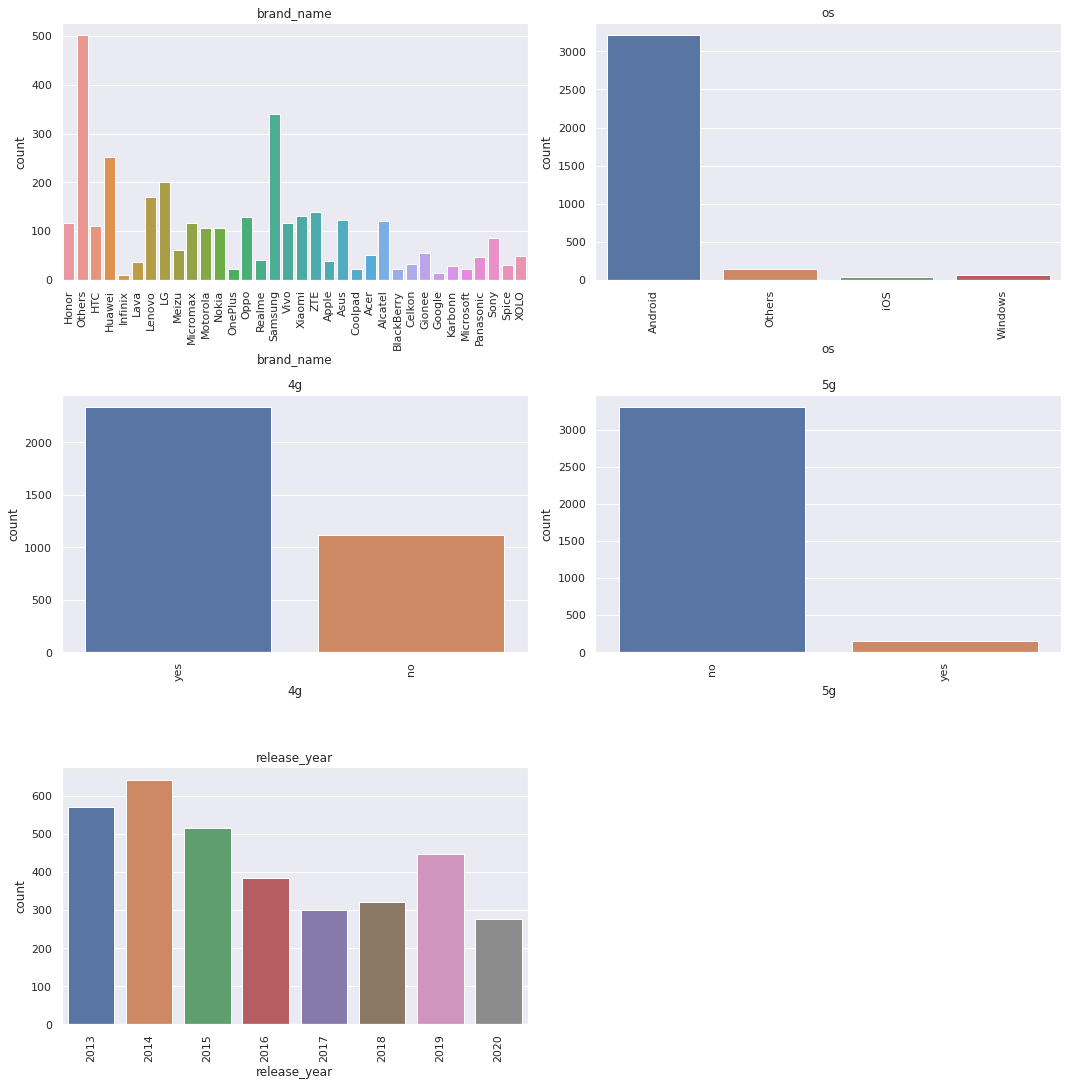

In [ ]:
#Ploting a countplot for all categorical features

plt.figure(figsize=(15,15))
sns.set_theme()

for i,column in enumerate(cat):
  plt.subplot(3, 2, i + 1)
  sns.countplot(data=df, x=df[column])
  plt.tight_layout()
  plt.title(column)
  plt.xticks(rotation=90)

plt.show()

Insights:

* Others, samsung and Huawei are the most common brands;
* Android is the most commom OS
* Vast majority of the phone support 4g and only few support 5g
* Older devices tend to be more present. 2019 appears as exception



In [ ]:
num = ['screen_size','main_camera_mp','selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight','days_used', 'normalized_used_price','normalized_new_price']
num

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

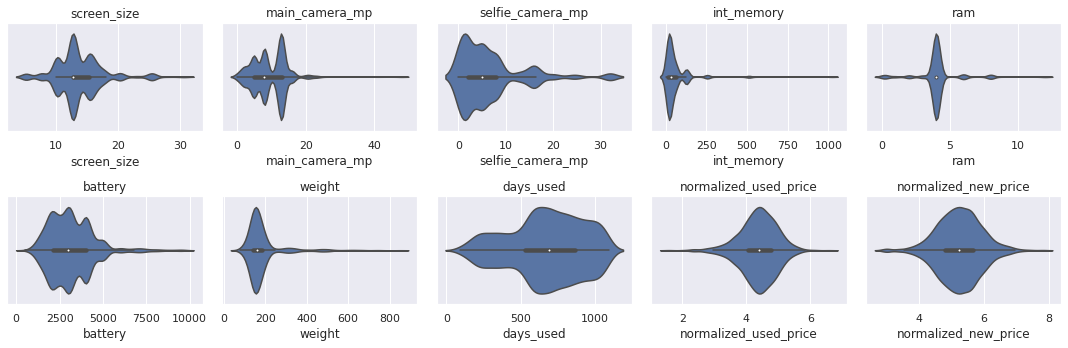

In [ ]:
plt.figure(figsize=(15,5))

for i,column in enumerate(num):
  plt.subplot(2, 5, i + 1)
  sns.violinplot(data=df, x=df[column])
  plt.tight_layout()
  plt.title(column)

plt.show()

Insights:

*   Only prices features follows close to a normal distribution
*   Screen size, both cameras, memory, ram, battery, weight, have long tails. Which indicate presence of outliers
*  Outliers are sort of expected due to wide variety of products, having smartphones and tablets into the dataset
* Days used distribution's is expected due to the distribution viewed at countplot of release year



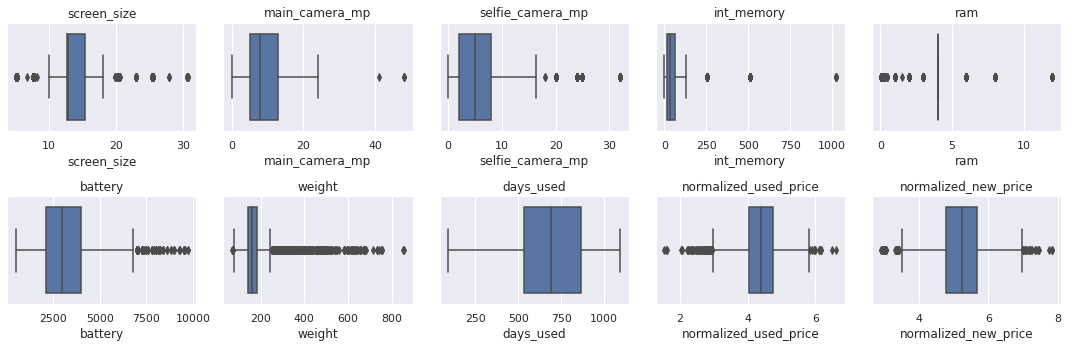

In [ ]:
plt.figure(figsize=(15,5))

for i,column in enumerate(num):
  plt.subplot(2, 5, i + 1)
  sns.boxplot(data=df, x=df[column])
  plt.tight_layout()
  plt.title(column)

plt.show()

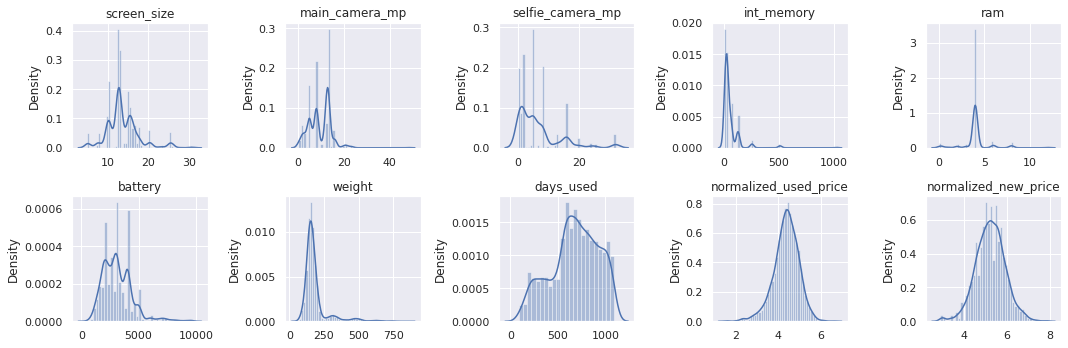

In [ ]:
plt.figure(figsize=(15,5))

for i,column in enumerate(num):
  plt.subplot(2, 5, i + 1)
  sns.distplot(x=df[column])
  plt.tight_layout()
  plt.title(column)

plt.show()

Multivariate Analysis

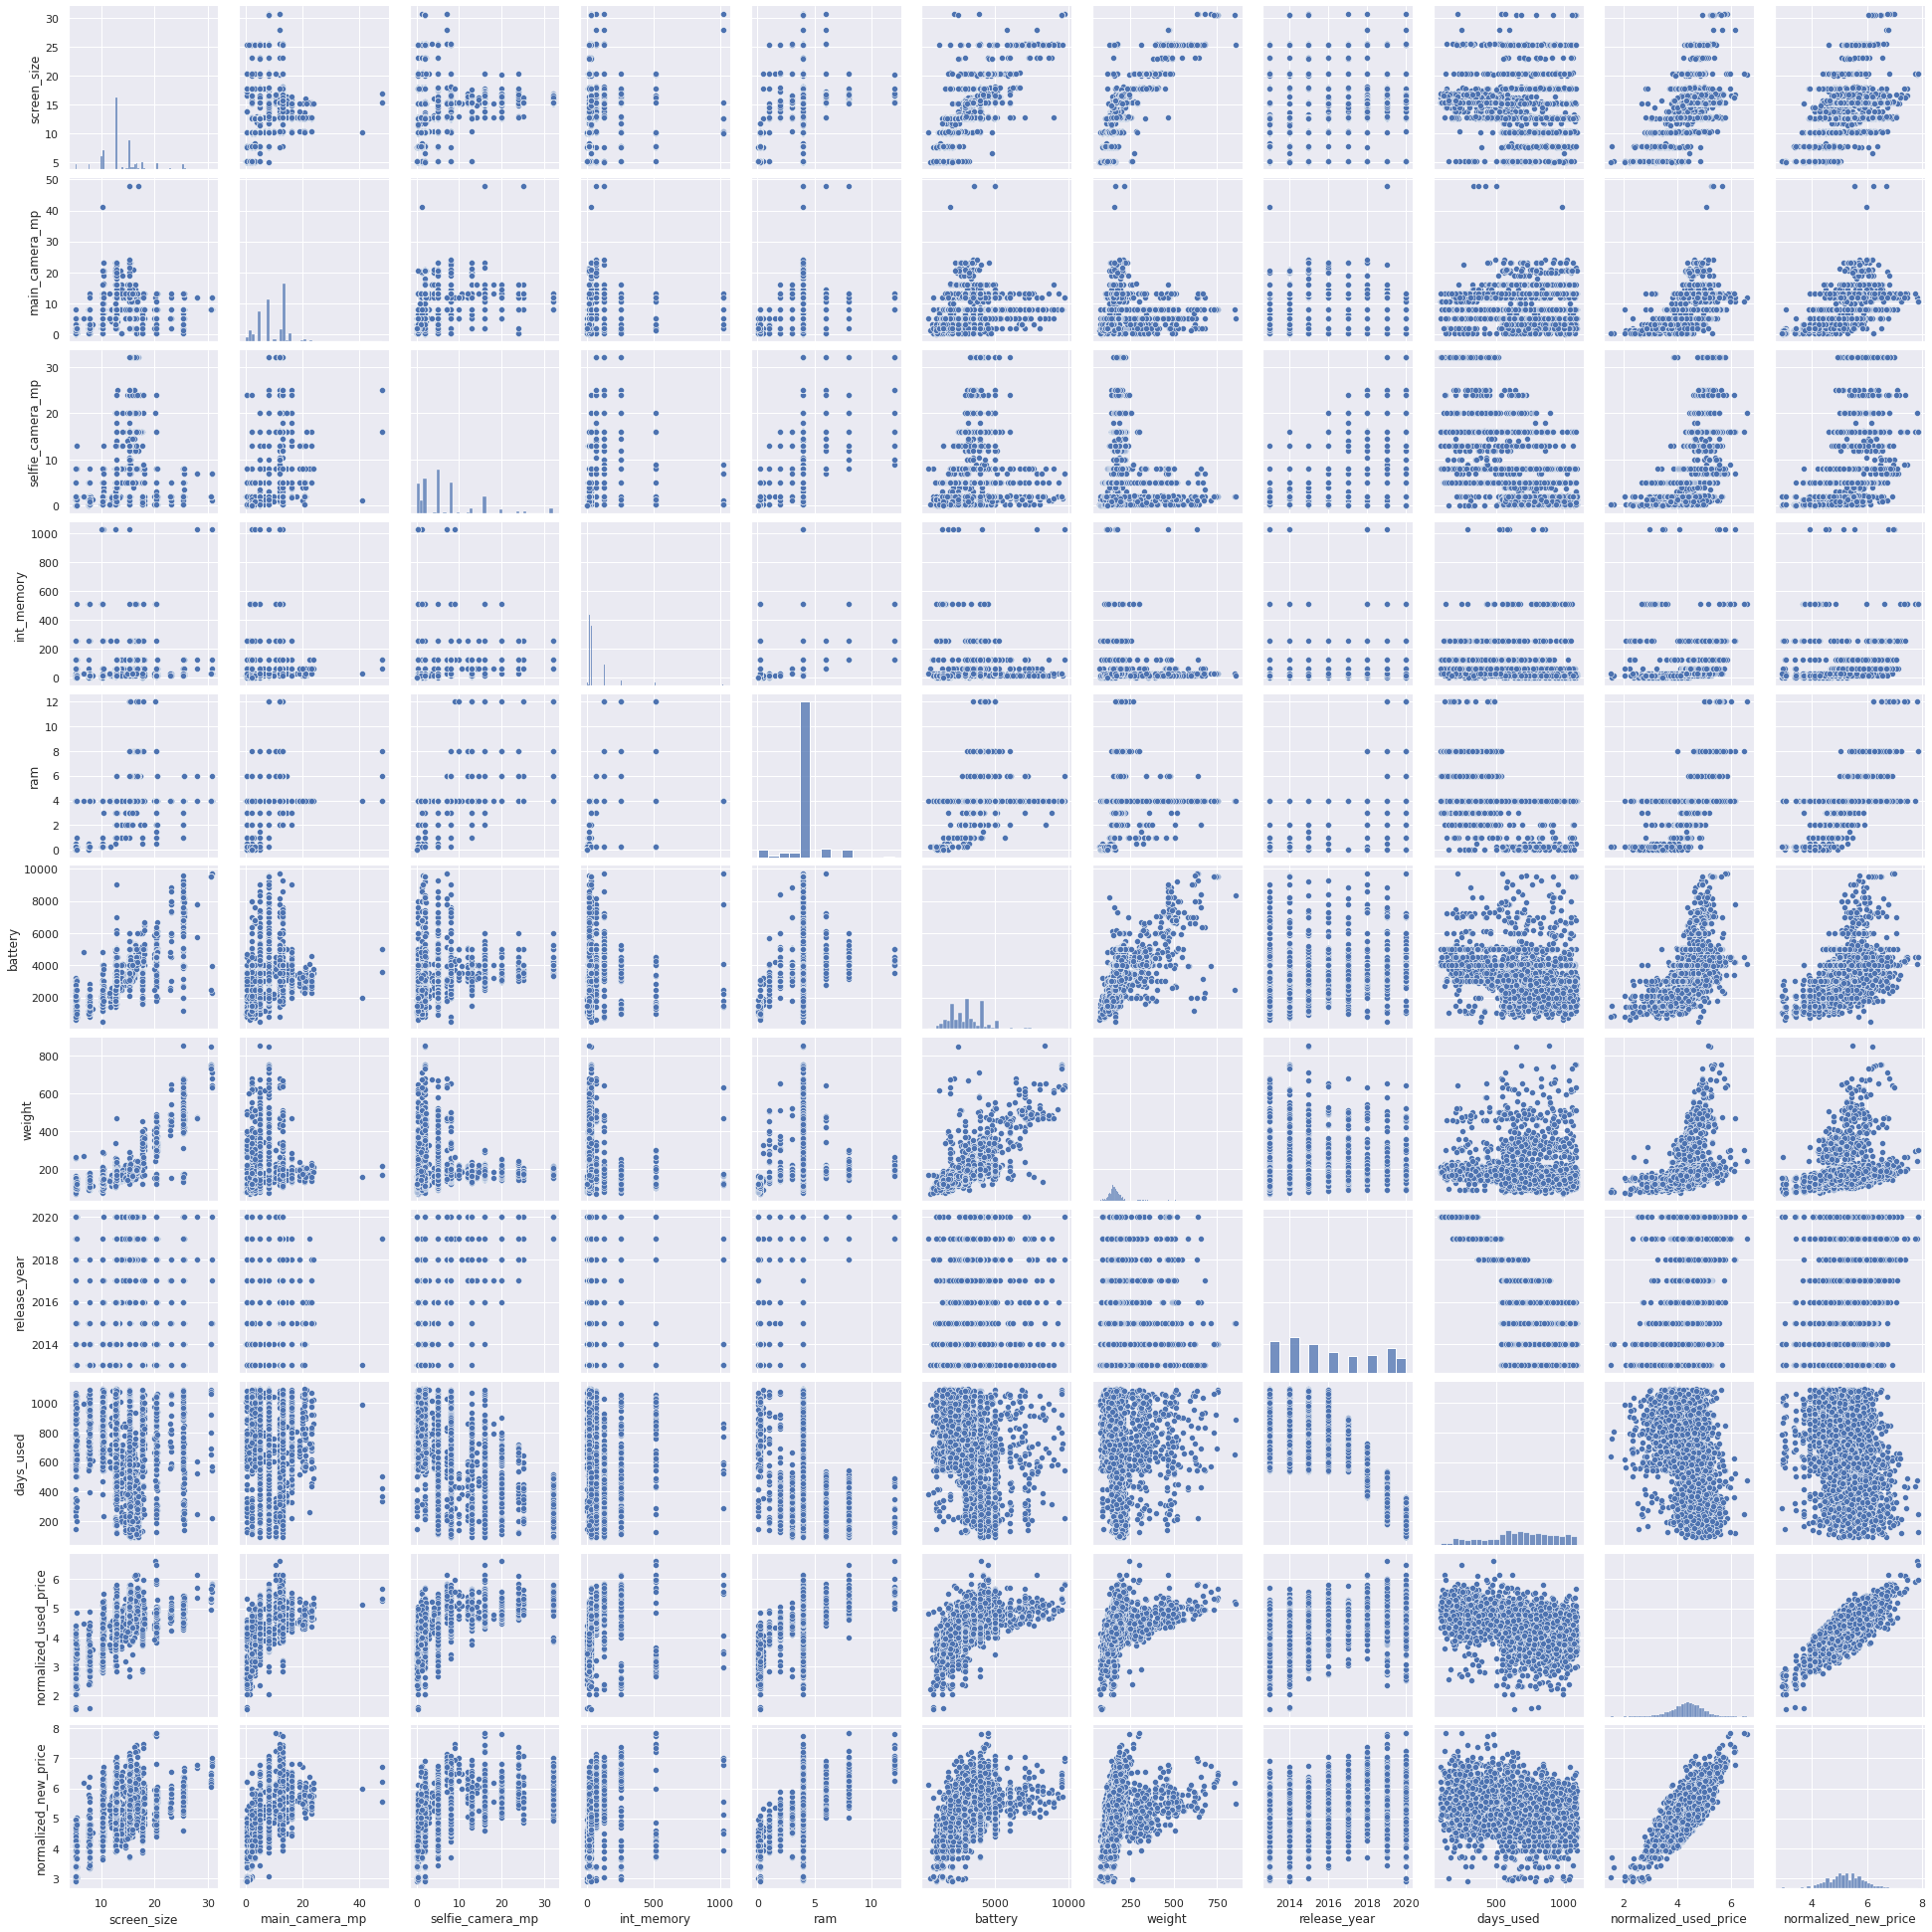

In [ ]:
sns.pairplot(df)

Insights:

Strong correlation between `normalize_used_price` and:


```
* normalized_new_price
* weight
* battery
```

`weight` seems to have a threshold and a second distribution emerging. Will do further analysis.

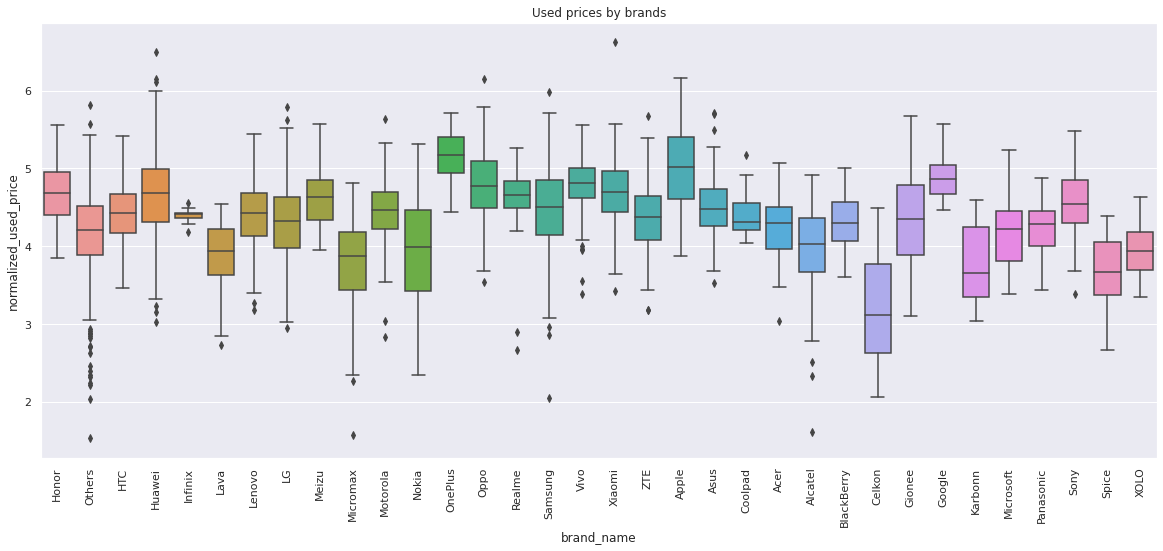

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, y=df['normalized_used_price'], x=df['brand_name']);
plt.title('Used prices by brands');
plt.xticks(rotation=90);

Insights:



*   Apples devices are the highests medians, Q3 and IQR but aren't the highest points in the graph.
*   Celkon devices are the lowest boxplot positions (Q2, Median, Q3), so we can affirm it's the cheapest brand. Even though there are lowest price devices of other brands in the dataset
* Google, Vivo and Realme have similar pricing strategies once that the boxplots are small and located at the same graphic region
* Some brands such as Nokia, Gionee, LG and Huawei have wide price ranges



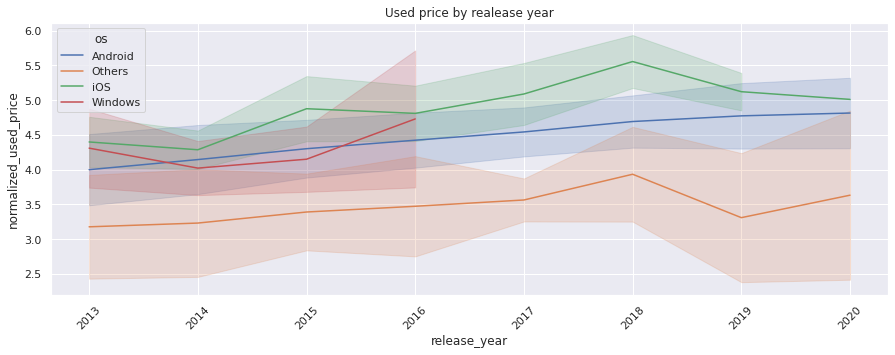

In [ ]:

plt.figure(figsize=(15,5))
sns.lineplot(data=df, x=df['release_year'], y=df['normalized_used_price'], hue=df['os'] , ci='sd');
plt.title('Used price by realease year');
plt.xticks(rotation=45);

Insights:

* The newer the device, higher the average price. The standard deviation increases in the devices with release year 2018 and on
* Android prices increases year by year linearly
* IOS devices seems to have season, increasing and decreasing through the year

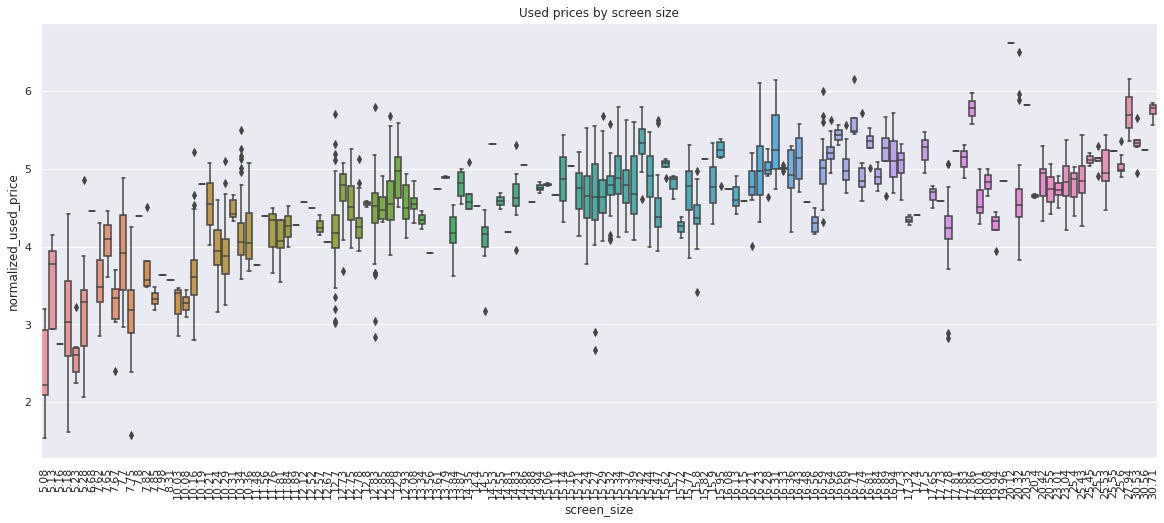

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, y=df['normalized_used_price'], x=df['screen_size']);
plt.title('Used prices by screen size');
plt.xticks(rotation=90);

Insights:

* As the size of the screen increses, the median and location of the boxes increases

Disclaimer: I know that scatterplots are better to visualize the relation between two numerical variables, **BUT** the `screen_size` has few values, and you cannot visualize the relationship as good as using the boxplot

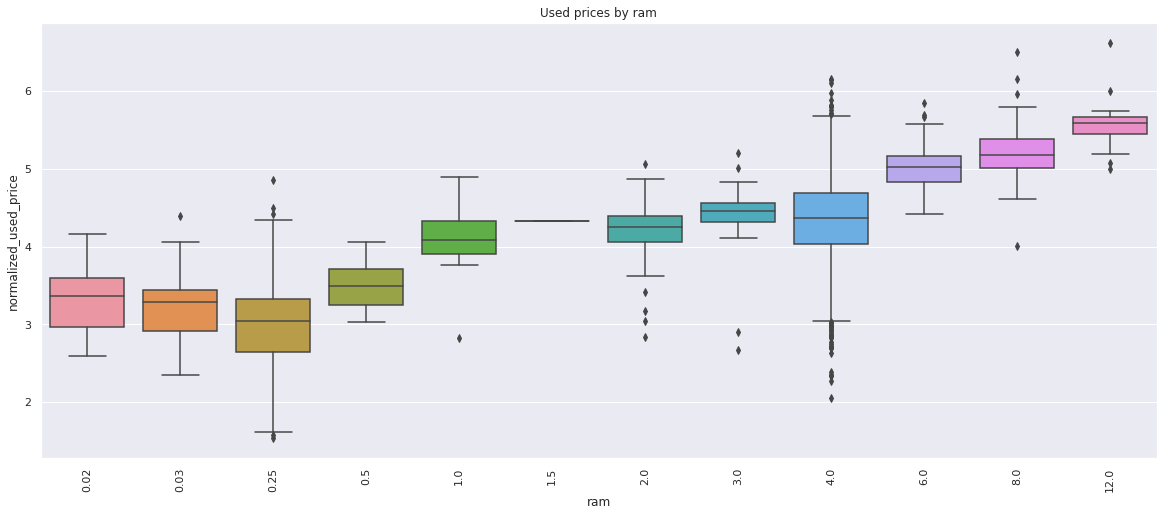

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, y=df['normalized_used_price'], x=df['ram']);
plt.title('Used prices by ram');
plt.xticks(rotation=90);

Insights:
* Same phenomena: higher the `ram` higher the boxplot measures and their medians.

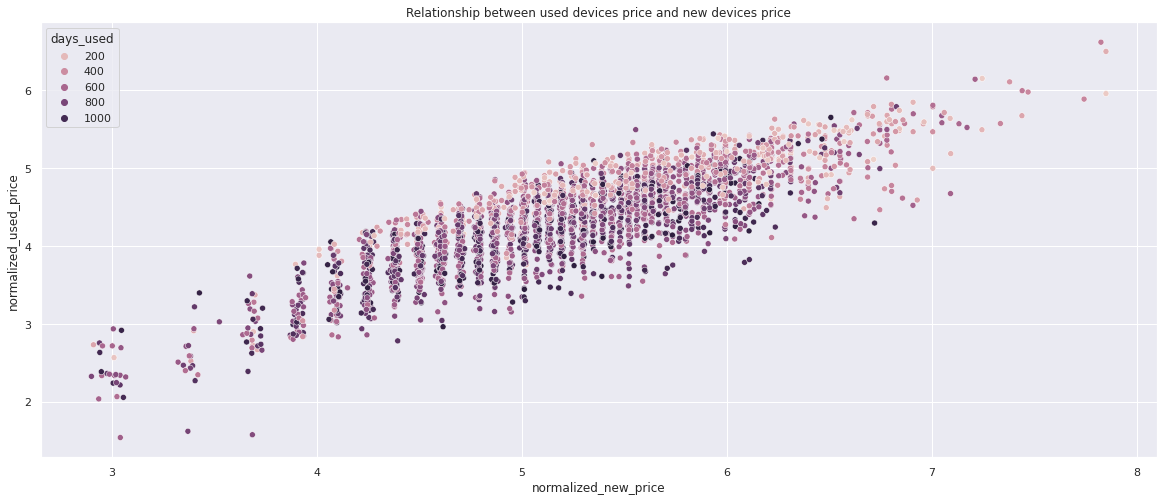

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, y=df['normalized_used_price'], x=df['normalized_new_price'], hue=df['days_used']);
plt.title('Relationship between used devices price and new devices price');

Insights:

* There's a strong colinear relationship between the prices. Perhaps new price is the best indicator of the used price
* We can see that the highers observations correspond to the smallest `days_used` and the more to the botton the observation is, the observation get's darker. **Which means that lesser the usage higher the price**

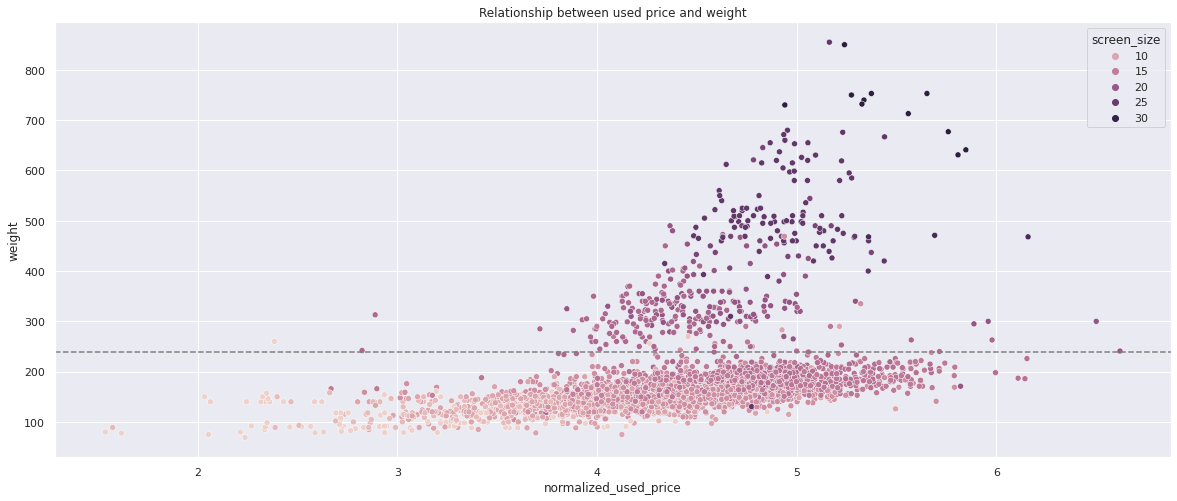

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, y=df['weight'], x=df['normalized_used_price'], hue=df['screen_size']);
plt.title('Relationship between used price and weight');
plt.axhline(y=(240), label='>= 400', linestyle='--', color='gray');

Insights:

* Weight and used price are positively correlated
* I've drown a threshold line where appear to be a division between to ditributions. Which could be understoond and the threshold that divide smartphones and tables.
* Above the threshold line the observations get darker and darkers, which indicates that the size of the screen are increasing
* In further analysis would be interesting to run a clustering algorith (such as k-means) and classify the devices into 2 groups and try developing one regression to each group.

Business questions:

1. What does the distribution of normalized used device prices look like?

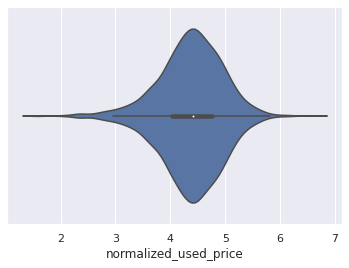

In [ ]:
sns.set_theme()
sns.violinplot(x = df['normalized_used_price']);

**the distribution of ```normalized_used_price``` follows close to a normal distribution. There's presence of left tail**

2. What percentage of the used device market is dominated by Android devices?


In [ ]:

df['os'].value_counts(normalize=True)

Android   0.931
Others    0.040
Windows   0.019
iOS       0.010
Name: os, dtype: float64

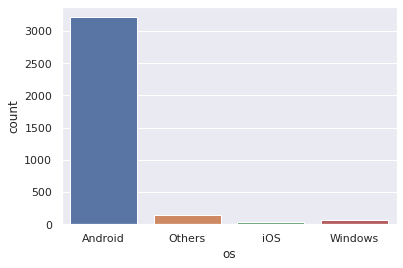

In [ ]:
sns.countplot(data=df, x=df['os']);

**93% of the devices are Android**

3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?


In [ ]:
order = df.groupby('brand_name')['ram'].mean().sort_values(ascending=False)
order

brand_name
OnePlus      6.364
Oppo         4.961
Vivo         4.756
Huawei       4.655
Honor        4.603
Xiaomi       4.583
Google       4.533
Meizu        4.452
Samsung      4.199
Realme       4.195
Sony         4.070
Asus         4.049
ZTE          4.023
HTC          4.000
Apple        4.000
XOLO         4.000
Microsoft    4.000
Panasonic    4.000
Coolpad      3.955
Motorola     3.943
LG           3.937
Gionee       3.933
Acer         3.902
Lenovo       3.886
BlackBerry   3.830
Others       3.778
Spice        3.750
Micromax     3.679
Alcatel      3.407
Karbonn      3.353
Lava         3.278
Infinix      2.600
Nokia        2.420
Celkon       1.614
Name: ram, dtype: float64

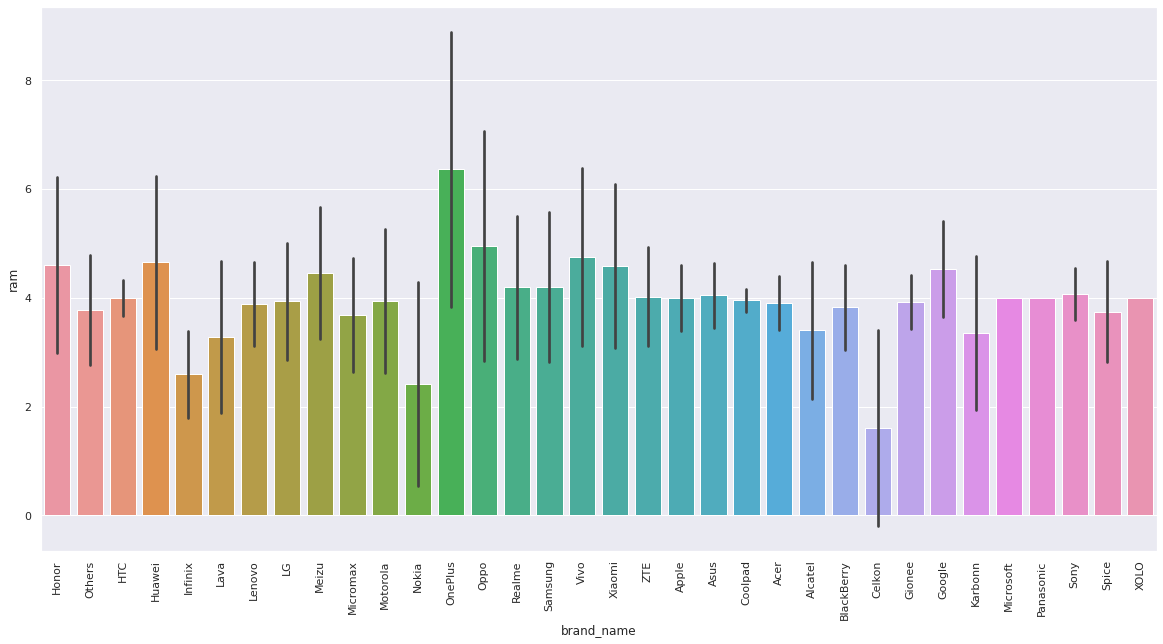

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x=df['brand_name'], y=df['ram'], ci='sd')
plt.xticks(rotation=90);

**One plus is the brand with higher RAM's average followed by Oppo and Huawei.**


4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?


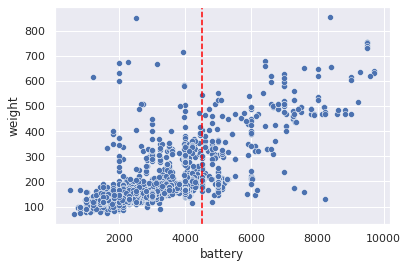

In [ ]:
sns.scatterplot(data=df, y=df['weight'], x=df['battery'])
plt.axvline(x=(4500), label='>= 4500', linestyle='--', color='red');

**Theres a positive linear relation between weight and battery. The higher the battery, higher the weight.**

**After the 4500mAh threshold there are less devices and so they are more spaced in the graph**

Latter I'll be using correlation coefficients to quantify the linear relation.


5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?


In [ ]:
#Once the question asked for the size in inches, I'll first create the column

df['screen_size_inches'] = df['screen_size'].apply(lambda x: x*0.393701)
df.loc[:,['screen_size','screen_size_inches']]

,screen_size,screen_size_inches
0,14.500,5.709
1,17.300,6.811
2,16.690,6.571
3,25.500,10.039
4,15.320,6.031
...,...,...
3449,15.340,6.039
3450,15.240,6.000
3451,15.800,6.220
3452,15.800,6.220


In [ ]:
#Filtering the dataset with screen bigger than 6 inches

sixinchesdf = df[df['screen_size_inches'] > 6]
sixinchesdf.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,screen_size_inches
1,Honor,Android,17.300,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,5.162,5.519,6.811
2,Honor,Android,16.690,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,5.111,5.885,6.571
3,Honor,Android,25.500,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,5.135,5.631,10.039
4,Honor,Android,15.320,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,4.390,4.948,6.031
5,Honor,Android,16.230,yes,no,13.000,8.000,64.000,4.000,4000.000,176.000,2020,223,4.414,5.061,6.390


In [ ]:
print(sixinchesdf.shape)
print("Devices with more than 6 inches correspond to",str(round((sixinchesdf.shape[0]/df.shape[0])*100,2)) +"% of the dataset")

(1228, 16)
Devices with more than 6 inches correspond to 35.55% of the dataset


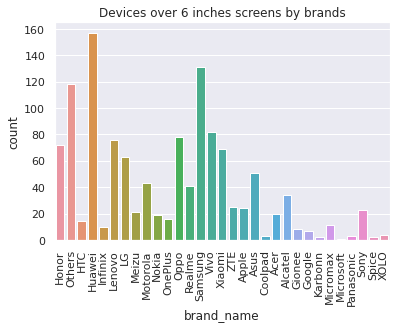

In [ ]:
#making a plot to visualize the amount of devices over 6 inches by brand

sns.countplot(data=sixinchesdf, x='brand_name')
plt.xticks(rotation=90)
plt.title('Devices over 6 inches screens by brands');

In [ ]:
sixinchesdf['brand_name'].value_counts(normalize=True)*100

Huawei      12.785
Samsung     10.668
Others       9.609
Vivo         6.678
Oppo         6.352
Lenovo       6.189
Honor        5.863
Xiaomi       5.619
LG           5.130
Asus         4.153
Motorola     3.502
Realme       3.339
Alcatel      2.769
ZTE          2.036
Apple        1.954
Sony         1.873
Meizu        1.710
Acer         1.629
Nokia        1.547
OnePlus      1.303
HTC          1.140
Micromax     0.896
Infinix      0.814
Gionee       0.651
Google       0.570
XOLO         0.326
Panasonic    0.244
Coolpad      0.244
Karbonn      0.163
Spice        0.163
Microsoft    0.081
Name: brand_name, dtype: float64

**Huawei (12.8%) and Samsung (10.7%) are the brands with higher amount of phones over six inches screens**

In [ ]:
#dropping inches variable

df = df.drop(["screen_size_inches"], axis=1)


6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?


In [ ]:
#filtering the dataset with selfie_cameras_mp over 8mp

greatherthan8 = df[df['selfie_camera_mp'] > 8]
print(greatherthan8.shape)
print("Devices with more than 8MP selfie camera",str(round((greatherthan8.shape[0]/df.shape[0])*100,2)) +"% of the dataset")

(655, 15)
Devices with more than 8MP selfie camera 18.96% of the dataset


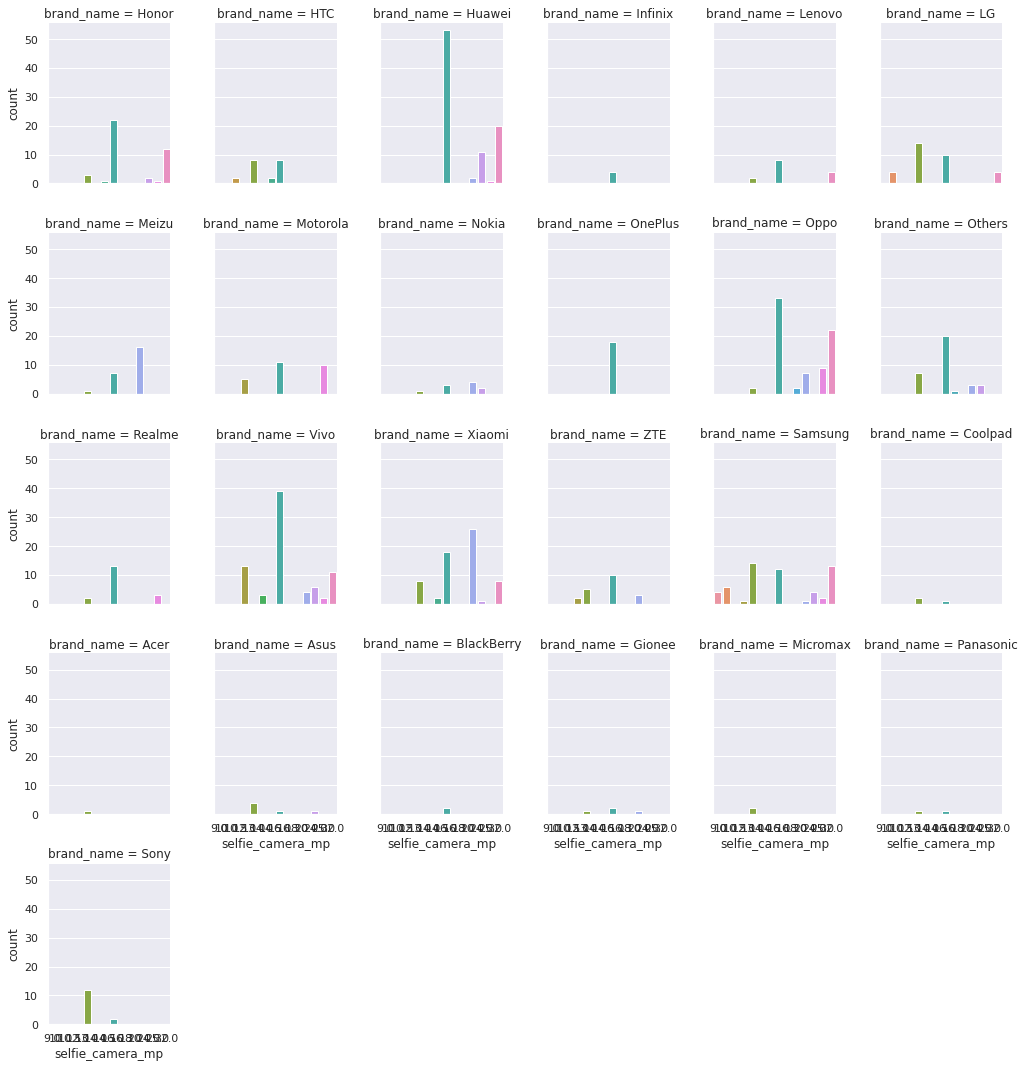

In [ ]:
sns.catplot(data=greatherthan8, col='brand_name', x='selfie_camera_mp', kind='count', col_wrap=6, legend=True, height=3, aspect=0.8);


Samsung and Huawei stand out as brands with most phones with higher mp selfie cameras.

Huawei, Vivo, Xiaomi and Oppo focus on the median MP selfie cameras.

Distribution of ```selfie_cameras_mp``` trough different brands



In [ ]:
greatherthan8['brand_name'].value_counts(normalize=True)*100

Huawei       13.282
Vivo         11.908
Oppo         11.450
Xiaomi        9.618
Samsung       8.702
Honor         6.260
Others        5.191
LG            4.885
Motorola      3.969
Meizu         3.664
HTC           3.053
ZTE           3.053
Realme        2.748
OnePlus       2.748
Lenovo        2.137
Sony          2.137
Nokia         1.527
Asus          0.916
Infinix       0.611
Gionee        0.611
Coolpad       0.458
BlackBerry    0.305
Micromax      0.305
Panasonic     0.305
Acer          0.153
Name: brand_name, dtype: float64

**Huawei, Vivo and Oppo are the brands with most phones over 8MP selfie cameras**


7. Which attributes are highly correlated with the normalized price of a used device?

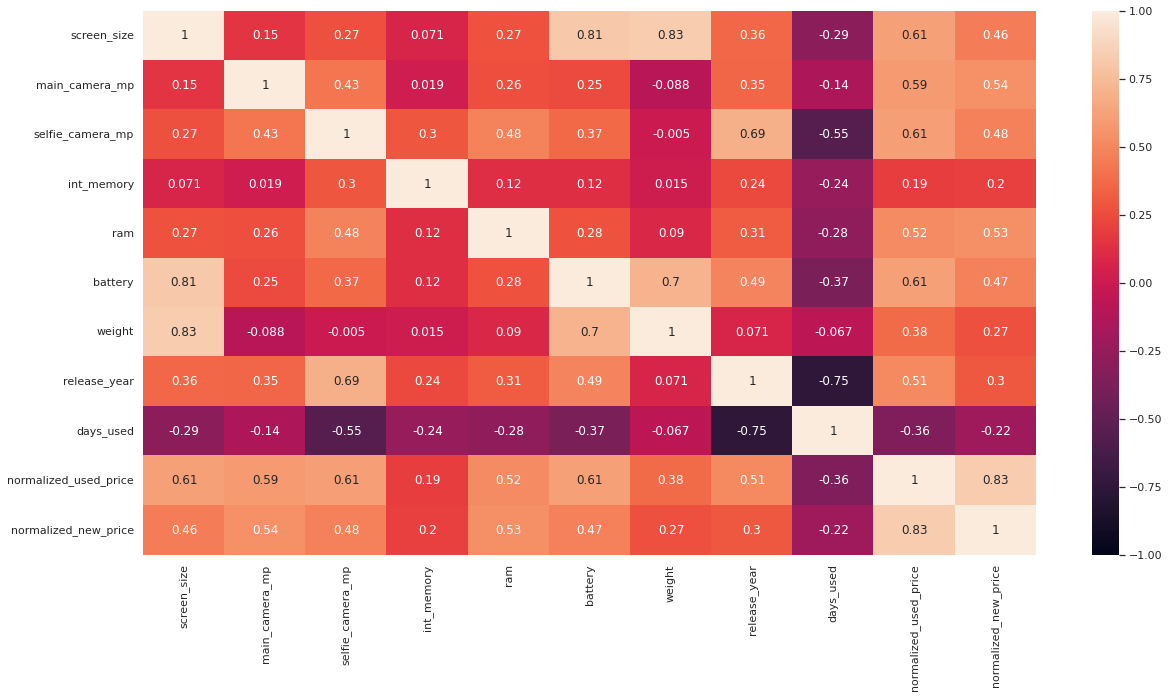

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, annot=True);

**Of the numerical features, i'd say only internal memory is not strongly correlated to the used price. All others have strong correlation coefficients**

---------------

Quantifying the relationship between battery and weight as previous asked:

Battery and weight have a correlation coefficient of +0.7 which we can classify as a strong relationship

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Treating null values

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#taking a look at the nulls values

null = pd.isnull(df['main_camera_mp'])
df[null].head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.320,yes,no,NaN,8.000,32.000,2.000,6000.000,209.000,2020,245,4.282,4.598
60,Infinix,Android,15.390,yes,no,NaN,8.000,64.000,4.000,5000.000,185.000,2020,173,4.364,4.712
61,Infinix,Android,15.390,yes,no,NaN,8.000,32.000,2.000,5000.000,185.000,2020,256,4.181,4.505
62,Infinix,Android,15.390,yes,no,NaN,16.000,32.000,3.000,4000.000,178.000,2019,316,4.555,4.602
63,Infinix,Android,15.290,yes,no,NaN,16.000,32.000,2.000,4000.000,165.000,2019,468,4.417,4.871


In [ ]:
df.median()

screen_size               12.830
main_camera_mp             8.000
selfie_camera_mp           5.000
int_memory                32.000
ram                        4.000
battery                 3000.000
weight                   160.000
release_year            2015.500
days_used                690.500
normalized_used_price      4.405
normalized_new_price       5.246
dtype: float64

once the dataset has lots of tails and skewness, I'll fill the NaN with the median

In [ ]:
df = df.fillna(df.median())

In [ ]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

One hot encoding (or dummy variables)

In [ ]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

Columns I'll do One Hot Encoding:

*   'brand_name'
*   'os'
* 4g
* 5g
* release year




I'm keeping the ´brand_name´ because brand is a huge factor for pricing the devices

In [ ]:
#Shape before the One Hot Encoding

df.shape

(3454, 15)

In [ ]:
df = pd.get_dummies(df, columns=["brand_name"], drop_first=True)
df = pd.get_dummies(df, columns=["os"], drop_first=True)
df = pd.get_dummies(df, columns=["4g"], drop_first=True)
df = pd.get_dummies(df, columns=["5g"], drop_first=True)
df = pd.get_dummies(df, columns=["release_year"], drop_first=True)


In [ ]:
#Shape after the one hot encoding

df.shape

(3454, 55)

In [ ]:
df.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,...,os_iOS,4g_yes,5g_yes,release_year_2014,release_year_2015,release_year_2016,release_year_2017,release_year_2018,release_year_2019,release_year_2020
0,14.500,13.000,5.000,64.000,3.000,3020.000,146.000,127,4.308,4.715,...,0,1,0,0,0,0,0,0,0,1
1,17.300,13.000,16.000,128.000,8.000,4300.000,213.000,325,5.162,5.519,...,0,1,1,0,0,0,0,0,0,1
2,16.690,13.000,8.000,128.000,8.000,4200.000,213.000,162,5.111,5.885,...,0,1,1,0,0,0,0,0,0,1
3,25.500,13.000,8.000,64.000,6.000,7250.000,480.000,345,5.135,5.631,...,0,1,1,0,0,0,0,0,0,1
4,15.320,13.000,8.000,64.000,3.000,5000.000,185.000,293,4.390,4.948,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'days_used', 'normalized_used_price',
       'normalized_new_price', 'brand_name_Alcatel', 'brand_name_Apple',
       'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon',
       'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
       'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei',
       'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_LG',
       'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
       'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola',
       'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo',
       'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme',
       'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
       'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi',
       'brand_name_ZTE', 'os_Others', 'os_Windows', 'os_iOS', '4g_yes',
       '5g_y

Once that Linear Regression is highly affected by outliers, I will replace everything outside the IQR * 1.5 by the median

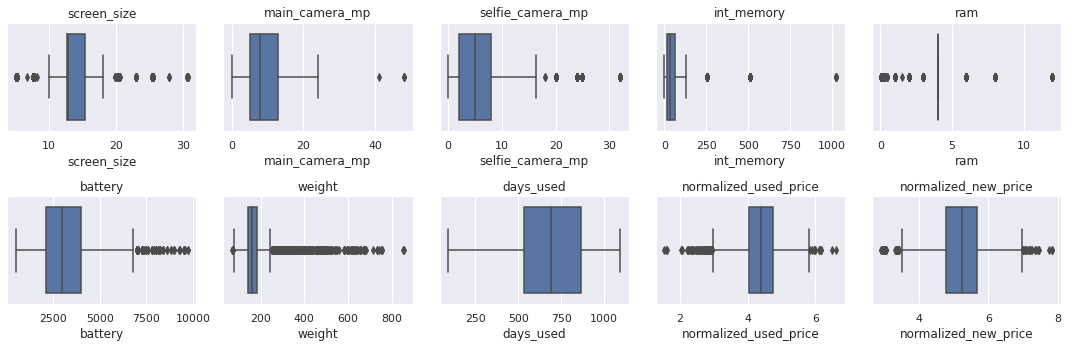

In [ ]:
#Remembering the distributions

plt.figure(figsize=(15,5))

for i,column in enumerate(num):
  plt.subplot(2, 5, i + 1)
  sns.boxplot(data=df, x=df[column])
  plt.tight_layout()
  plt.title(column)

plt.show()

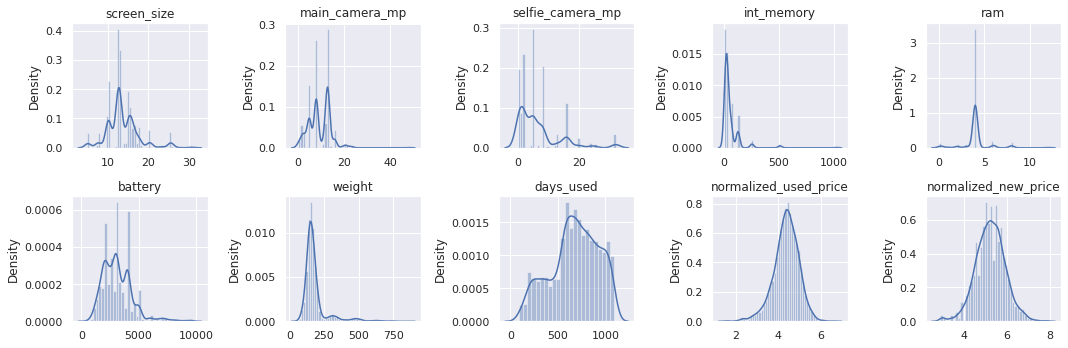

In [ ]:
plt.figure(figsize=(15,5))

for i,column in enumerate(num):
  plt.subplot(2, 5, i + 1)
  sns.distplot(x=df[column])
  plt.tight_layout()
  plt.title(column)

plt.show()

I will eliminate the outliers of:

* `battery`
* `weight`

Altough `screen_size`, `both cameras`, `int memory` and `ram` also have high amount of outliers they have low number of unique values. Once I reduce it's variation (by replacing outliers with median) they will loose their correlation (or/and, linearity) with the target variable

The other possible way out here, IMHO, is transforming them using One hot encoding. But for that they have large amount of unique values, which increase too much the model complexity.

For that, I'll keep them as they are in order to not lose information

Outlier treatment for `battery`

In [ ]:
#calculate interquartile range 
q3, q1 = np.percentile(df['battery'], [75 ,25])
iqr = q3 - q1

median = df['battery'].median()

#display interquartile range 
print("IQR:",iqr)

#defining outliers range
lower_limit = median - (iqr * 1.5)
higher_limit = median + (iqr * 1.5)


print("Median:",median)
print("Lower limit:",lower_limit)
print("Higher limit:",higher_limit)


IQR: 1900.0
Median: 3000.0
Lower limit: 150.0
Higher limit: 5850.0


In [ ]:
df["battery"] = np.where(df["battery"] >higher_limit, median,df['battery'])
df["battery"] = np.where(df["battery"] <lower_limit, median,df['battery'])

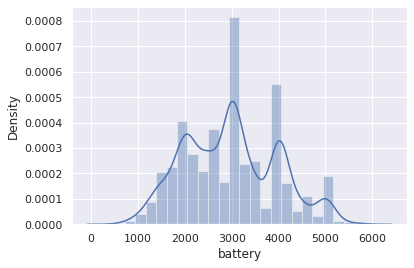

In [ ]:
sns.distplot(df['battery']);

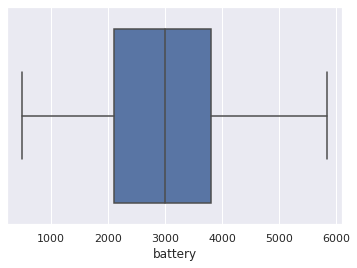

In [ ]:
sns.boxplot(df['battery']);

Outlier treatment for `Weight`


In [ ]:
#calculate interquartile range 
q3, q1 = np.percentile(df['weight'], [75 ,25])
iqr = q3 - q1

median = df['weight'].median()

#display interquartile range 
print("IQR:",iqr)

#defining outliers range
lower_limit = median - (iqr * 1.5)
higher_limit = median + (iqr * 1.5)


print("Median:",median)
print("Lower limit:",lower_limit)
print("Higher limit:",higher_limit)

IQR: 43.0
Median: 160.0
Lower limit: 95.5
Higher limit: 224.5


In [ ]:
df["weight"] = np.where(df["weight"] >higher_limit, median,df['weight'])
df["weight"] = np.where(df["weight"] <lower_limit, median,df['weight'])

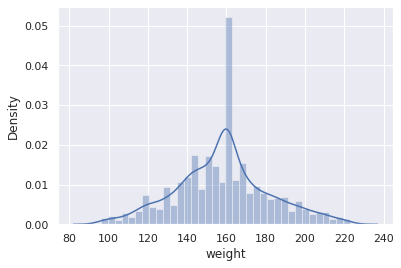

In [ ]:
sns.distplot(df['weight']);

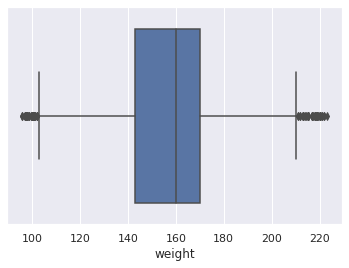

In [ ]:
sns.boxplot(df['weight']);

## EDA

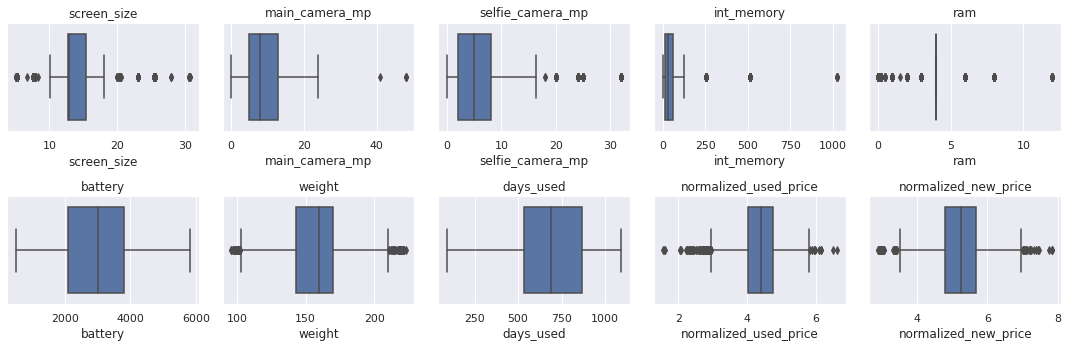

In [ ]:
#Remembering the distributions

plt.figure(figsize=(15,5))

for i,column in enumerate(num):
  plt.subplot(2, 5, i + 1)
  sns.boxplot(data=df, x=df[column])
  plt.tight_layout()
  plt.title(column)

plt.show()

Insighs:
* Much cleaner distributions for `battery` and `weight`. 

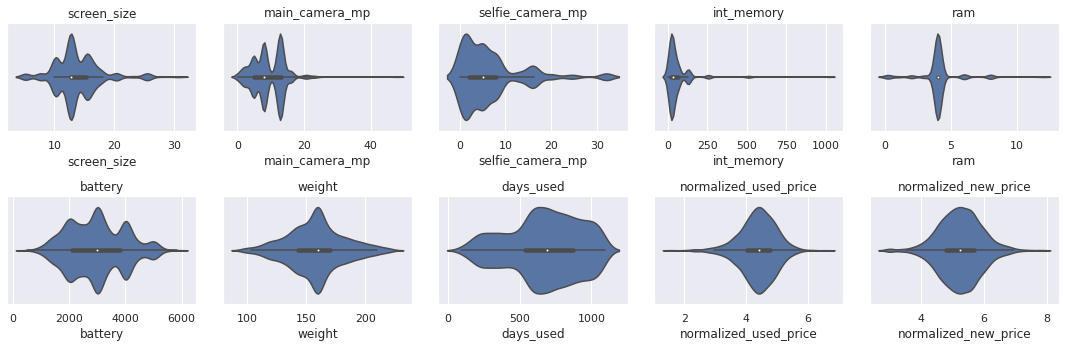

In [ ]:
plt.figure(figsize=(15,5))

for i,column in enumerate(num):
  plt.subplot(2, 5, i + 1)
  sns.violinplot(data=df, x=df[column])
  plt.tight_layout()
  plt.title(column)

plt.show()

**Won't be performing further analysis because the insights taken after the first EDA haven't beeing changed by these preprocessing steps**

## Model Building - Linear Regression

In [ ]:
# defining X and y variables
X = df.drop(["normalized_used_price"], axis=1)
y = df["normalized_used_price"]

# add the intercept to data
X = sm.add_constant(X)

print(X.shape)
print(y.shape)



(3454, 55)
(3454,)


In [ ]:
print(X.head())

   const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
0  1.000       14.500          13.000             5.000      64.000 3.000   
1  1.000       17.300          13.000            16.000     128.000 8.000   
2  1.000       16.690          13.000             8.000     128.000 8.000   
3  1.000       25.500          13.000             8.000      64.000 6.000   
4  1.000       15.320          13.000             8.000      64.000 3.000   

   battery  weight  days_used  normalized_new_price  ...  os_iOS  4g_yes  \
0 3020.000 146.000        127                 4.715  ...       0       1   
1 4300.000 213.000        325                 5.519  ...       0       1   
2 4200.000 213.000        162                 5.885  ...       0       1   
3 3000.000 160.000        345                 5.631  ...       0       1   
4 5000.000 185.000        293                 4.948  ...       0       1   

   5g_yes  release_year_2014  release_year_2015  release_year_2016  \
0       0 

In [ ]:
print(y.head())

0   4.308
1   5.162
2   5.111
3   5.135
4   4.390
Name: normalized_used_price, dtype: float64


Split test and training data

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     236.7
Date:                   Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                           16:19:07   Log-Likelihood:                 117.08
No. Observations:                   2417   AIC:                            -124.2
Df Residuals:                       2362   BIC:                             194.3
Df Model:                             54                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Interpreting the Regression Results:

1. Adjusted R-squared: 0.84 which is a really good result (YEEY!!)
2. Y-intercept: 0.9662

## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231,0.180,0.844,0.840,4.332


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241,0.187,0.839,0.830,4.550


**Observations**:

*   The test RMSE is slightly higher than the training set, but still very low and both number are comparable, so the model is not overfitting 
*   The R2 is 0.83 so the model is not underfitting
*   MAE suggest that the model can predict within a mean error of 0.187




Dropping due to the high P-value

In [ ]:
x_train2 = x_train.drop(["days_used"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.844 
Adjusted R-squared: 0.84


Since removing `days_used` has no effect on the r2, let's remove from the training dataset

In [ ]:
x_train = x_train.drop(["days_used"], axis=1)

Fitting and training again the model:

In [ ]:
olsmodel_2 = sm.OLS(y_train, x_train).fit()
print(olsmodel_2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     241.1
Date:                   Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                           16:19:07   Log-Likelihood:                 116.64
No. Observations:                   2417   AIC:                            -125.3
Df Residuals:                       2363   BIC:                             187.4
Df Model:                             53                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


`battery` and `int_memory` are a little above the treshold. I'll maintain both variable in order to keep the good R2.

The coeff has moved to 0.9928

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Checking the following Linear Regression assumptions:

* No Multicollinearity

* Linearity of variables

* Independence of error terms

* Normality of error terms

* No Heteroscedasticity

CHECKING FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   232.762
screen_size               2.111
main_camera_mp            2.187
selfie_camera_mp          2.881
int_memory                1.380
ram                       2.280
battery                   3.141
weight                    2.154
normalized_new_price      3.281
brand_name_Alcatel        3.422
brand_name_Apple         13.288
brand_name_Asus           3.336
brand_name_BlackBerry     1.642
brand_name_Celkon         1.805
brand_name_Coolpad        1.475
brand_name_Gionee         1.951
brand_name_Google         1.331
brand_name_HTC            3.439
brand_name_Honor          3.378
brand_name_Huawei         6.022
brand_name_Infinix        1.296
brand_name_Karbonn        1.599
brand_name_LG             4.874
brand_name_Lava           1.723
brand_name_Lenovo         4.562
brand_name_Meizu          2.181
brand_name_Micromax       3.386
brand_name_Microsoft      1.901
brand_name_Motorola       3.290
brand_name_Nokia          3.513
brand_name_OnePlus        


We will tolerate >5 VIF in the dummy variables

**The VIF indicates that there are no multicollinearity in the predictorts variables.**

CHECKING FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel_2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel_2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087,3.818,0.269
1525,4.448,4.661,-0.213
1128,4.315,4.336,-0.020
3003,4.282,4.297,-0.015
2907,4.456,4.453,0.003


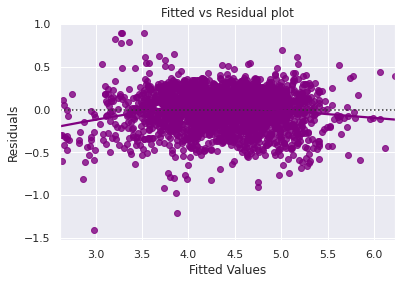

In [ ]:
# Plotting the residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


**We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.** 

TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

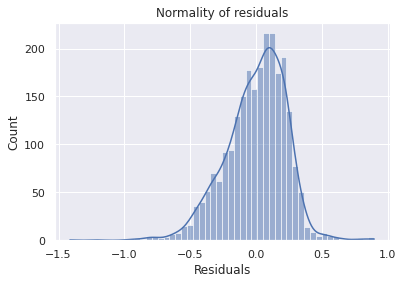

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

The distribution presents some tails but is close enough to a normal distribution

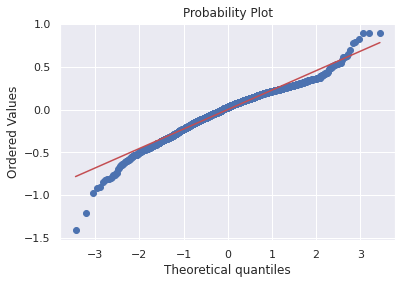

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The tails shows discrepances but more or less the residuals follow a straight line

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.973010778427124, pvalue=5.942155731748027e-21)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.

**So, the assumption is satisfied.**

TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train)
lzip(name, test)

[('F statistic', 1.0622090197785476), ('p-value', 0.1526239863310864)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. 

**So, this assumption is satisfied.**

## Final Model

In [ ]:
print(olsmodel_2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     241.1
Date:                   Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                           16:19:10   Log-Likelihood:                 116.64
No. Observations:                   2417   AIC:                            -125.3
Df Residuals:                       2363   BIC:                             187.4
Df Model:                             53                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Actionable Insights and Recommendations 

- CONCLUSIONS AND RECOMMENDATIONS

1. The model is able to explain ~84% of the variation of the data. (this indicates that the model is good for both prediction and inference purposes)
2. Most correlated features to the used price are:

  * `normalized_new_price`
  * `selfie_camera`
  * `screen_size`
  * `battery`

3. If the Screen size of the phone increases by one unit, then the used price increases by 0.0409 if all other variables held constant.
4. If the new price of the phone increases by one unit, then the used price increases by 0.4299 if all other variables hold constant.
5. If the selfie camera increases by one unit, then the used price increases by 0.0130 if all other variables held constant.
6. The amount of used devices is decreasing through the years, which makes sense once the older de device more probably the owner will buy a new one and make the older available for sale. (exception to 2019)
7. Would be interesting if the company start to classify the devices between tablets and smartphones. So we could make better prediction and inferences.
8. 93% of the devices have Android as OS
9. The newer the device, higher the average price, the standard deviation increases in the devices with release year 2018 and on
10. The less used the device, higher the used price
11. `normalized_new_price` could be the most valuable variable to predict and make inferences to the target variable, because it has the strongest correlation with `normalized_used_price` and has a significant statistical value for the regression (P-value = 0)
12. In further analysis would be interesting to run a clustering algorith (such as k-means) and classify the devices into 2 groups (tablets and smartphones) and try developing one regression to each group.